In [46]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings


In [28]:
data = pd.read_csv('new_churn_data.csv')

In [29]:
data = data.dropna()

In [30]:
user_identifier = dataset['user']
data = data.drop(columns = ['user'])

In [31]:
data.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [32]:
data.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [33]:
data2 = pd.get_dummies(data)
data2.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'rewards_earned', 'reward_rate', 'is_referred',
       'housing_O', 'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [34]:
y = data2["churn"]
X = data2.drop(["churn"],axis=1)

In [35]:
sc_X = StandardScaler()
X2 = pd.DataFrame(sc_X.fit_transform(X),index=X.index,columns=X.columns)
X2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0.479703,-0.365978,-0.290909,-0.664762,-0.365664,-0.168728,-1.042450,-0.058109,-0.055057,-0.656054,...,-0.160990,-0.295501,3.220485,-0.292527,-0.292452,-0.28712,-0.29178,-0.300511,-0.313087,-0.294536
1,-0.423489,-0.365978,-0.290909,-0.641077,-0.365664,-0.168728,0.037815,-0.058109,-0.055057,-0.255976,...,-0.160990,-0.295501,3.220485,-0.292527,-0.292452,-0.28712,-0.29178,-0.300511,-0.313087,-0.294536
2,0.278994,4.780858,1.603984,1.372156,4.883688,-0.168728,2.164586,-0.058109,-0.055057,0.064087,...,6.211568,-0.295501,-0.310512,-0.292527,-0.292452,-0.28712,-0.29178,-0.300511,-0.313087,-0.294536
3,-0.624198,2.481208,2.551431,0.235272,2.426545,-0.168728,-0.209746,-0.058109,-0.055057,1.424355,...,6.211568,-0.295501,-0.310512,-0.292527,-0.292452,-0.28712,-0.29178,-0.300511,-0.313087,-0.294536
4,-0.523844,-0.365978,-0.290909,-0.617392,-0.365664,-0.168728,-1.042450,-0.058109,-0.055057,-0.656054,...,-0.160990,-0.295501,-0.310512,-0.292527,-0.292452,-0.28712,-0.29178,-0.300511,-0.313087,-0.294536


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [37]:
X_train.isna().sum()

age                          0
deposits                     0
withdrawal                   0
purchases_partners           0
purchases                    0
cc_taken                     0
cc_recommended               0
cc_disliked                  0
cc_liked                     0
cc_application_begin         0
app_downloaded               0
web_user                     0
ios_user                     0
android_user                 0
registered_phones            0
waiting_4_loan               0
cancelled_loan               0
received_loan                0
rejected_loan                0
left_for_two_month_plus      0
left_for_one_month           0
rewards_earned               0
reward_rate                  0
is_referred                  0
housing_O                    0
housing_R                    0
housing_na                   0
payment_type_Bi-Weekly       0
payment_type_Monthly         0
payment_type_Semi-Monthly    0
payment_type_Weekly          0
payment_type_na              0
zodiac_s

In [38]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.6407


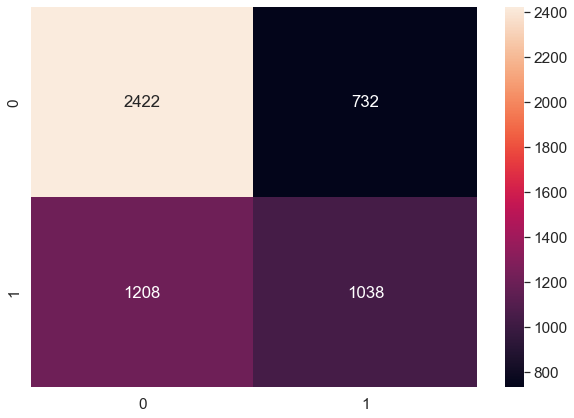

In [41]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [42]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\Users\SAleem\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

In [53]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression()

In [54]:
rfe = RFE(cl, 20)
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given